### 1. Preparation

Installing required libraries

In [9]:
#%pip install matplotlib
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install scikit-learn
#%pip install statsmodels

Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Data Preprocessing

##### 2.a Import Dataset

In [11]:
df = pd.read_csv('customer_churn_data.csv', sep=';')
df.head()

CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   

  InternetService TotalCharges TechSupport Churn  
0     Fiber Optic        353.4         Yes   Yes  
1     Fiber Optic          0.0         Yes   Yes  
2     Fiber Optic       127.58          No   Yes  
3             DSL       818.72         Yes   Yes  
4             NaN      2208.32          No   Yes

##### 2.b Dataset General Info

Checking data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   object 
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


Change TotalCharges into float64

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     829 non-null    float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


Check the number of rows and columns

In [15]:
df.shape #rows, cols

(1000, 10)

Check duplicated values

In [16]:
df.duplicated().sum()

np.int64(0)

Check null values

In [17]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges       171
TechSupport          0
Churn                0
dtype: int64

There are two columns that have Null values:

    a. InternetService (object) => we can impute this by creating new category
    b. TotalCharges (float64) => we can impute this by using median

#### 2.c Impute Missing Data

##### 2.c.1 InternetService

Create new category called "Not Mentioned"

In [18]:
df['InternetService'] = df['InternetService'].fillna('Not Mentioned')

<Axes: xlabel='InternetService', ylabel='count'>

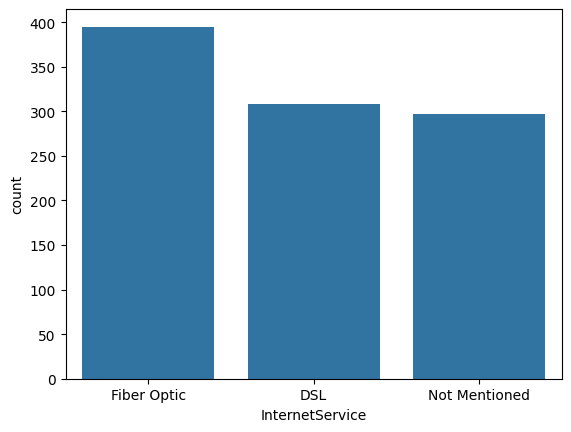

In [19]:
sns.countplot(df, x='InternetService')

**This method is actually a simplified version of SimpleImputer (without using sklearn library), for reference:**

https://www.youtube.com/watch?v=k3KrhjvaCq0

We can impute the "Not Mentioned" values using One Hot Encoder:

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

or by using "simpleImputer":

https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/

##### 2.c.2 TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

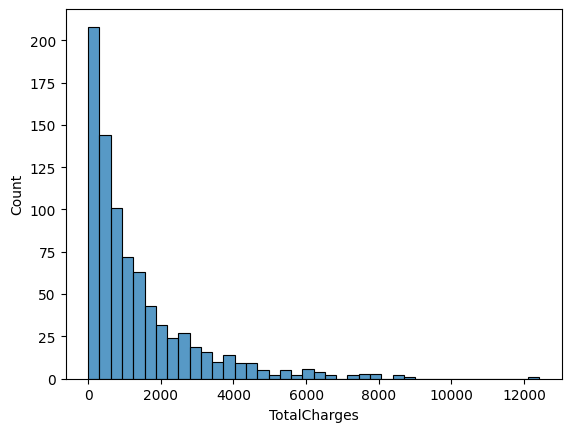

In [20]:
sns.histplot(df, x='TotalCharges')

The distribution is not normal, therefore we need to use median to impute the data

In [21]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [22]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [23]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

#### 2.d Dataset Statistical Info

In [24]:
df.describe()

CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1256.095960
std     288.819436     9.797741    18.89257       25.712083   1453.373048
min       1.000000    12.000000     0.00000       30.000000      0.000000
25%     250.750000    38.000000     5.00000       52.357500    377.400000
50%     500.500000    45.000000    13.00000       74.060000    796.320000
75%     750.250000    51.000000    26.00000       96.102500   1509.257500
max    1000.000000    83.000000   122.00000      119.960000  12416.250000

#### 2.e Drop 0.00 Float Values from TotalCharges

Is not possible for TotalCharges (which is accumulation of MonthlyCharges) to be 0

In [25]:
# df['TotalCharges'].drop(columns=df.columns[(df == 0.000000).any()])
df = df[df['TotalCharges'] != 0.00]

In [26]:
df['TotalCharges'].describe()

count      949.000000
mean      1323.599536
std       1461.672772
min         30.060000
25%        466.140000
50%        796.320000
75%       1563.520000
max      12416.250000
Name: TotalCharges, dtype: float64

In [27]:
df.shape

(949, 10)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 81.6+ KB


#### 2.f Outlier Detection

In [29]:
#Outlier Detection using IQR

q1 = df['Tenure'].quantile(0.25)
q3 = df['Tenure'].quantile(0.75)

print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

threshold = 1.5

IQR = q3-q1

tenure_outliers = df[(df['Tenure'] < q1 - threshold * IQR) | (df['Tenure'] > q3 + threshold * IQR)]
tenure_outliers

Q1 = 6.0
Q3 = 28.0


CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
18           19   35    Male      98           49.59        Two-Year   
29           30   42    Male      62           97.66        Two-Year   
112         113   45  Female      88           51.73  Month-to-Month   
119         120   52  Female      66           80.96  Month-to-Month   
131         132   45  Female      62           86.22  Month-to-Month   
136         137   37  Female      82           98.11  Month-to-Month   
138         139   53    Male      64           93.67  Month-to-Month   
155         156   37  Female      67           90.73        One-Year   
164         165   54    Male     101           54.78  Month-to-Month   
175         176   53  Female      66          100.12        Two-Year   
189         190   29    Male      79           83.36        One-Year   
202         203   55    Male      78           47.70  Month-to-Month   
207         208   50    Male      62           32.70  Month-to-Month   
231         232   47    Male      63           98.34        Two-Year   
233         234   38  Female     122           69.58  Month-to-Month   
259         260   52    Male      62           86.16        One-Year   
280         281   46    Male      77           47.56  Month-to-Month   
329         330   51  Female      66           53.69        One-Year   
340         341   36    Male      67          112.87  Month-to-Month   
350         351   48    Male      62           73.85        One-Year   
398         399   43    Male      66           61.06  Month-to-Month   
405         406   51    Male      74           91.06  Month-to-Month   
421         422   62  Female      73           37.10        Two-Year   
437         438   31    Male      63           75.14        Two-Year   
440         441   48    Male      94           89.57        One-Year   
442         443   24    Male      65           97.85  Month-to-Month   
469         470   39    Male      63           56.99        Two-Year   
486         487   38    Male      79           30.97        One-Year   
490         491   44  Female      64           81.92        Two-Year   
493         494   36  Female     105          118.25  Month-to-Month   
495         496   50  Female      79           36.05        Two-Year   
502         503   31    Male      79           45.53  Month-to-Month   
507         508   36    Male      64          118.52  Month-to-Month   
509         510   36  Female      75          117.28        One-Year   
540         541   53    Male      99          113.93  Month-to-Month   
610         611   51  Female      72           76.27        Two-Year   
617         618   52    Male      68          118.05  Month-to-Month   
631         632   60  Female      83           89.36  Month-to-Month   
667         668   60    Male      76           82.49        One-Year   
683         684   49  Female      70           68.35  Month-to-Month   
689         690   49    Male      68          113.74  Month-to-Month   
741         742   32    Male      78          101.44        Two-Year   
745         746   37  Female      70           56.05        One-Year   
759         760   52  Female      69           31.46        One-Year   
771         772   39    Male      67          118.12  Month-to-Month   
795         796   55  Female      63           60.72  Month-to-Month   
800         801   54  Female      75           31.23        Two-Year   
941         942   53    Male      64           98.99        One-Year   
998         999   39    Male      68           65.67        One-Year   

    InternetService  TotalCharges TechSupport Churn  
18      Fiber Optic        796.32         Yes    No  
29      Fiber Optic       6054.92         Yes    No  
112     Fiber Optic       4552.24         Yes   Yes  
119     Fiber Optic       5343.36         Yes   Yes  
131             DSL       5345.64          No   Yes  
136     Fiber Optic        796.32          No   Yes  
138     Fiber Optic       

In [30]:
df['Tenure'].describe()

count    949.000000
mean      19.992624
std       18.860664
min        1.000000
25%        6.000000
50%       14.000000
75%       28.000000
max      122.000000
Name: Tenure, dtype: float64

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_9260\3147014193.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tenure'], shade=True, color='blue')


<Axes: xlabel='Tenure', ylabel='Density'>

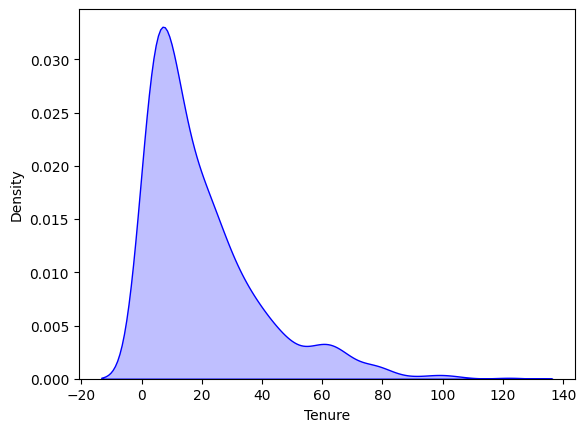

In [31]:
sns.kdeplot(df['Tenure'], shade=True, color='blue')

In [32]:
#Outlier Detection using IQR

q1 = df['TotalCharges'].quantile(0.25)
q3 = df['TotalCharges'].quantile(0.75)

print(f'Q1 = {q1}')
print(f'Q3 = {q3}')

threshold = 1.5

IQR = q3-q1

total_charges_outliers = df[(df['TotalCharges'] < q1 - threshold * IQR) | (df['TotalCharges'] > q3 + threshold * IQR)]
total_charges_outliers

Q1 = 466.14
Q3 = 1563.52


CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
24           25   39    Male      47           79.36        One-Year   
28           29   38  Female      34          100.38        Two-Year   
29           30   42    Male      62           97.66        Two-Year   
30           31   38    Male      34          102.27  Month-to-Month   
98           99   45    Male      44          111.09        Two-Year   
..          ...  ...     ...     ...             ...             ...   
910         911   41    Male      39           82.70        Two-Year   
929         930   44    Male      44           95.72  Month-to-Month   
941         942   53    Male      64           98.99        One-Year   
952         953   32  Female      40           82.61  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   

    InternetService  TotalCharges TechSupport Churn  
24              DSL       3729.92         Yes    No  
28              DSL       3412.92         Yes   Yes  
29      Fiber Optic       6054.92         Yes    No  
30              DSL       3477.18          No   Yes  
98    Not Mentioned       4887.96          No   Yes  
..              ...           ...         ...   ...  
910             DSL       3225.30         Yes    No  
929     Fiber Optic       4211.68          No   Yes  
941     Fiber Optic       6335.36          No   Yes  
952   Not Mentioned       3304.40          No   Yes  
998   Not Mentioned       4465.56          No   Yes  

[91 rows x 10 columns]

In [33]:
df['TotalCharges'].describe()

count      949.000000
mean      1323.599536
std       1461.672772
min         30.060000
25%        466.140000
50%        796.320000
75%       1563.520000
max      12416.250000
Name: TotalCharges, dtype: float64

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_9260\1154907917.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], shade=True, color='blue')


<Axes: xlabel='TotalCharges', ylabel='Density'>

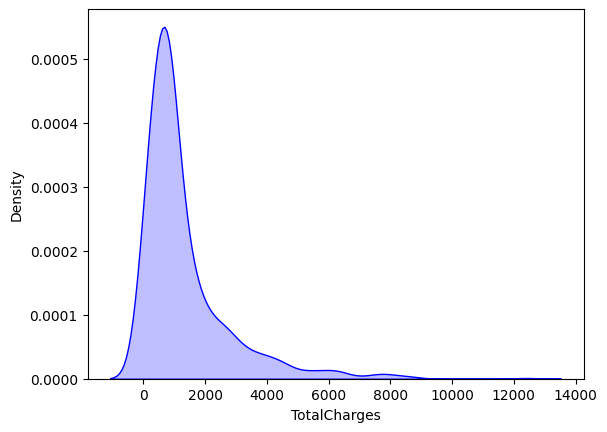

In [34]:
sns.kdeplot(df['TotalCharges'], shade=True, color='blue')

Better to use no transformation because it gets the highest score or considered to drop the outliers all together

**Drop the outliers**

In [35]:
# df = df.drop(tenure_outliers.index)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 81.6+ KB


In [37]:
# df = df.drop(total_charges_outliers.index)

**Impute the value using median**

In [38]:
# #tenure
# median_tenure = df['Tenure'].median()

# #impute the data
# df.loc[tenure_outliers.index, 'Tenure'] = median_tenure

In [39]:
# # total charges
# total_charges_median = df['TotalCharges'].median()

# #impute the data
# df.loc[tenure_outliers.index, 'TotalCharges'] = total_charges_median

After the imputation:

<Axes: xlabel='Tenure', ylabel='Density'>

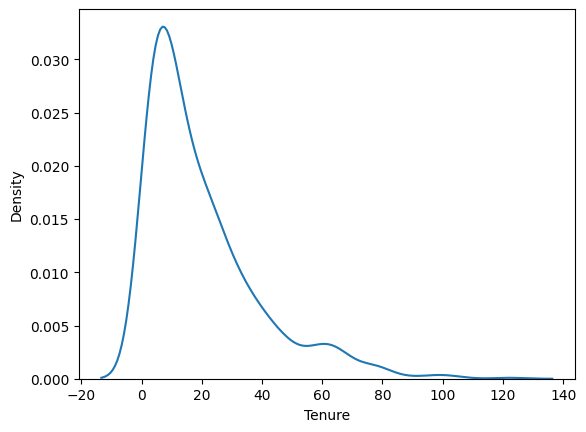

In [40]:
sns.kdeplot(df['Tenure'])

In [41]:
df['Tenure'].describe()

count    949.000000
mean      19.992624
std       18.860664
min        1.000000
25%        6.000000
50%       14.000000
75%       28.000000
max      122.000000
Name: Tenure, dtype: float64

In [42]:
# sns.kdeplot(df['TotalCharges'])

#### 2.g Data Transformation

Buat 2 copy untuk dataframe yang nanti akan diberikan transformasi berikut:
- Log transform
- Reciprocal transform

Abis itu nanti pas modeling dibandingin nilainya gimana buat ngeliat paling bagus yang mana

**Perlu diingat bahwa pada totalcharges dan tenure ada heterodiascity dan relationshipnya lebih ke non-linear, makanya dicoba untuk di transform pake beberapa metode untuk membandingkan mana yang lebih oke untuk menjelaskan relationship linear**

https://medium.com/womenintechnology/log-transformation-to-mitigate-the-effect-of-outliers-413cdd275495#:~:text=Log%20transformations%20are%20a%20powerful,the%20performance%20of%20statistical%20models, accesed on Oct 12th, 2024

In [43]:
#log transform
df['Tenure_log'] = np.log(df['Tenure'] + 10e6)

In [44]:
#reciprocal transform
df['Tenure_recp'] = 1 / df['Tenure']

In [45]:
df

CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
5             6   42  Female      16          119.75        Two-Year   
..          ...  ...     ...     ...             ...             ...   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport Churn  Tenure_log  Tenure_recp  
0       Fiber Optic        353.40         Yes   Yes   16.118096     0.250000  
2       Fiber Optic        127.58          No   Yes   16.118096     0.500000  
3               DSL        818.72         Yes   Yes   16.118096     0.125000  
4     Not Mentioned       2208.32          No   Yes   16.118099     0.031250  
5               DSL       1916.00         Yes   Yes   16.118097     0.062500  
..              ...           ...         ...   ...         ...          ...  
995     Fiber Optic       1522.74         Yes   Yes   16.118100     0.024390  
996   Not Mentioned        796.32          No   Yes   16.118097     0.111111  
997     Fiber Optic       1675.80         Yes   Yes   16.118097     0.066667  
998   Not Mentioned       4465.56          No   Yes   16.118102     0.014706  
999   Not Mentioned         56.67          No   Yes   16.118096     1.000000  

[949 rows x 12 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    object 
 10  Tenure_log       949 non-null    float64
 11  Tenure_recp      949 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 96.4+ KB


In [47]:
#square root transformation

# df['TotalCharges'] = np.sqrt(df['TotalCharges'])
# print("Dataset with Square Root Transformation TotalCharges:")
# df.head()

In [48]:
#cube root transformation

# df['Tenure'] = np.cbrt(df['Tenure'])
# print("Dataset with Cube Root Transformation Tenure:")
# df.head()

In [49]:
# sns.kdeplot(df['Tenure'])

In [50]:
# count_all_inf = ((df['TotalCharges'] == np.inf) | (df['TotalCharges'] == -np.inf)).sum()
# print(count_all_inf)

Drop the infinite value

In [51]:
# df['Tenure'].replace(-np.inf, np.nan, inplace=True)

# df.dropna(subset=['Tenure'], inplace=True)

kalau linear regression data yang di modelkan tidak diasumsikan berdistribusi normal, std errornya baru diasumsikan berdistribusi normal


lakukan transformation dari data tsb jika:
- lebih mudah diinterpretasi koefisiennya
- dapat menghasilkan hubungan lebih linier

jika hasilnya sama, berarti gausah, make aja yang awal/weight

salah satu alternatif untuk mengatasi variance adallah weighted

kalau negatif hasil coef modelnya bisa make rata2 dari kolom (kalau datanya kontinu) untuk dijadikan prediktor

dia gabisa ngubah nilai model score, tp bisa ngubah cara interpretasinya lebih mudah

#### 2.h Data Correlation

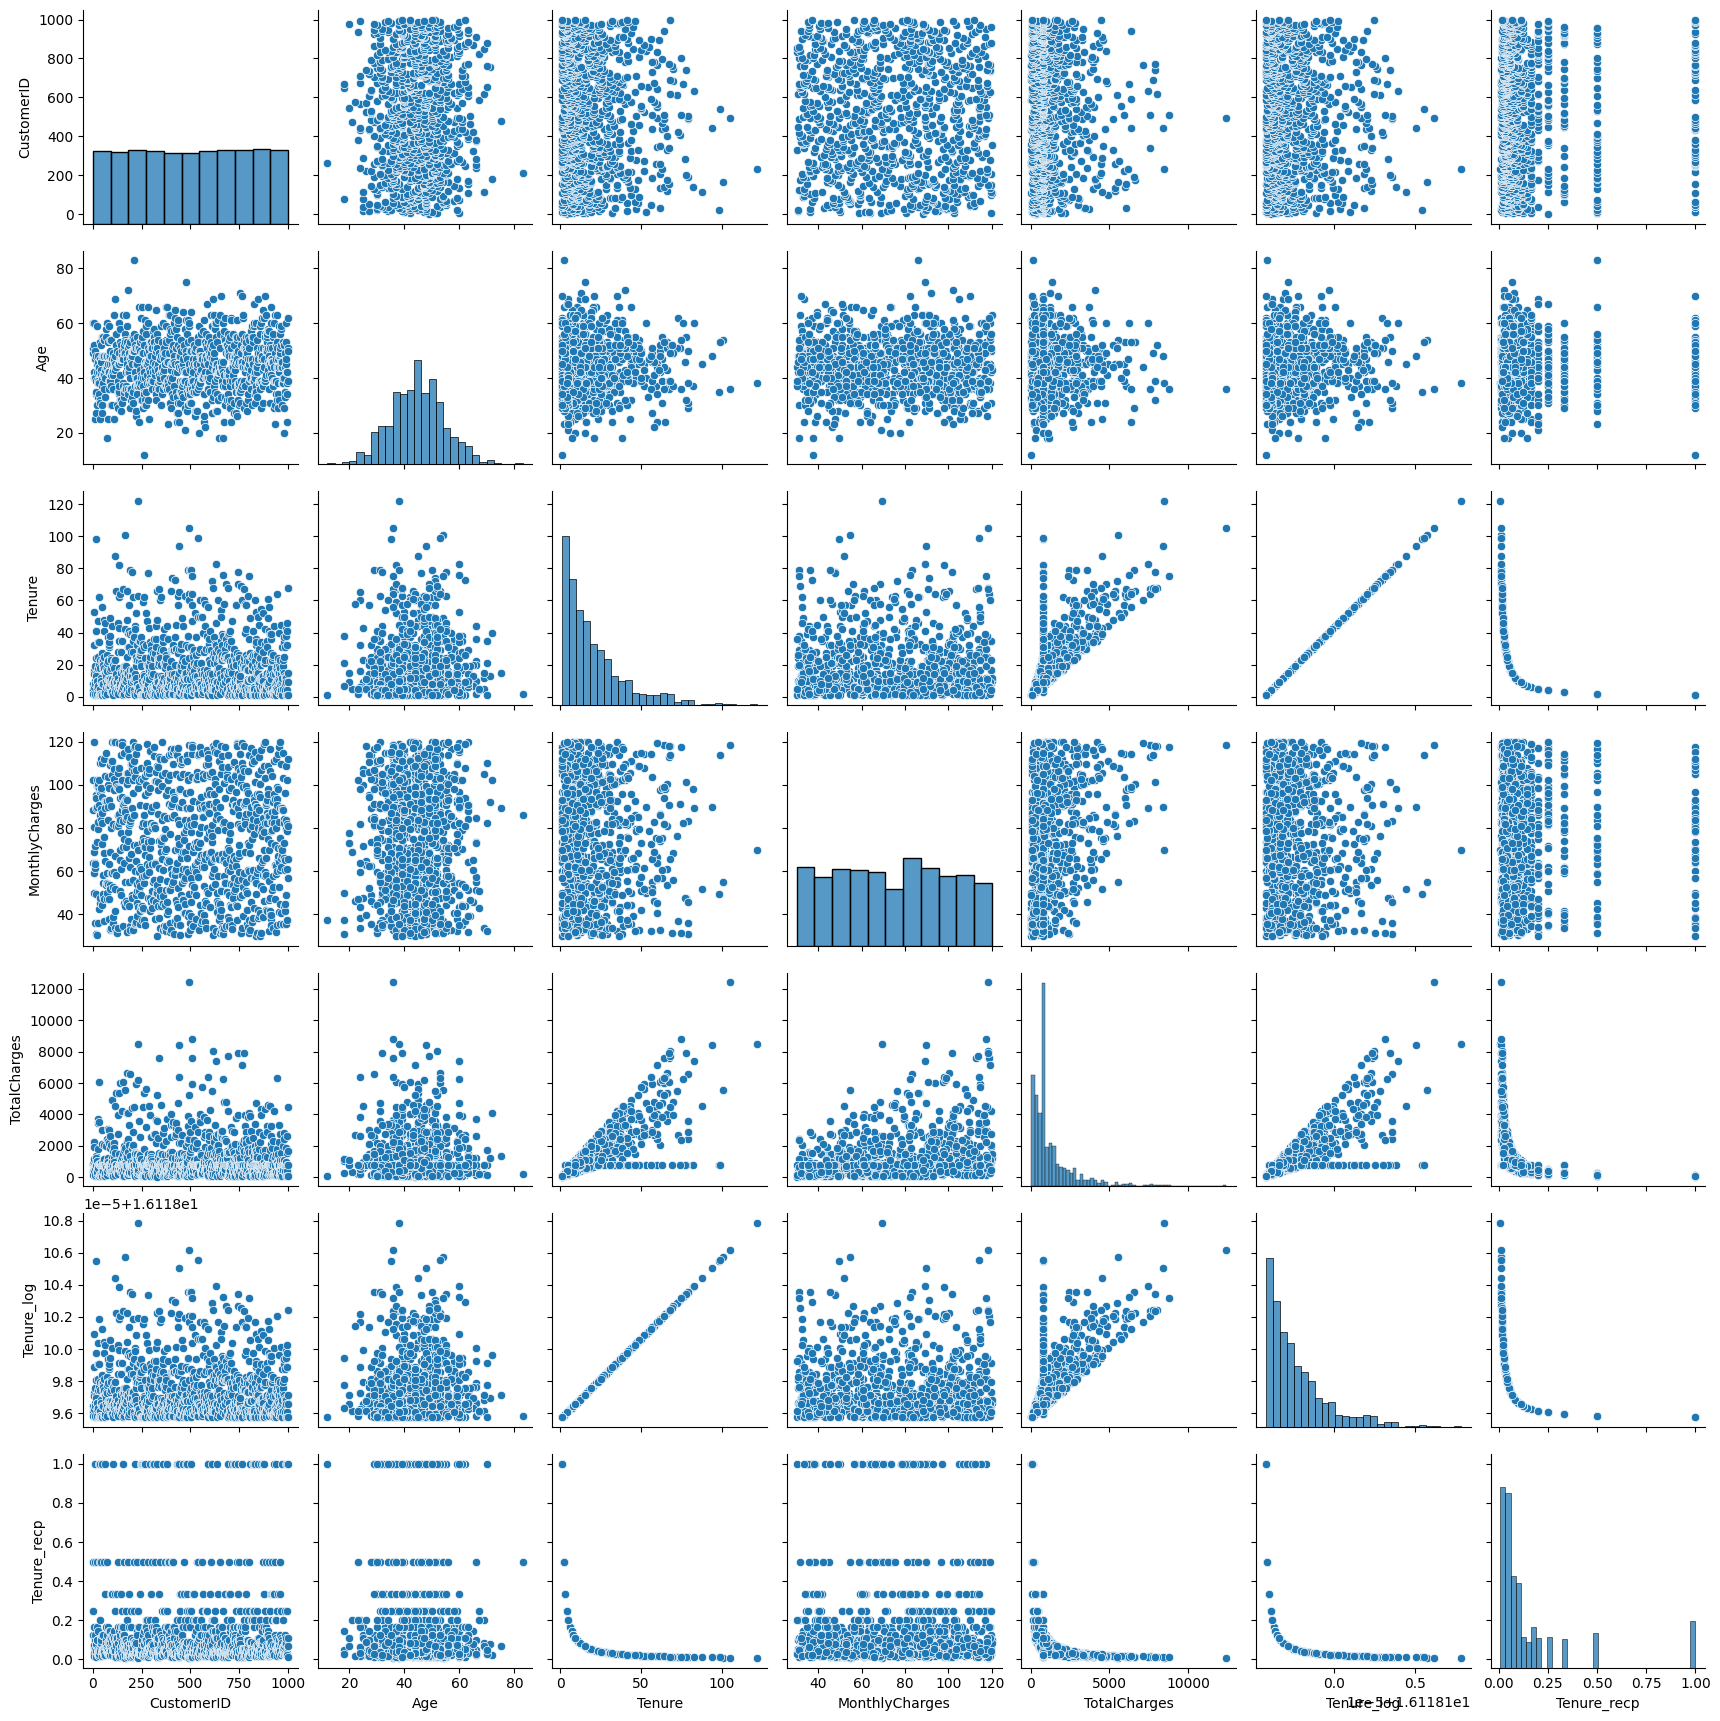

In [52]:
sns.pairplot(df)

Let's take a look at the correlation by using Heatmap:

In [53]:
numeric_columns = df.select_dtypes(np.number)
corr = numeric_columns.corr()
corr

CustomerID       Age    Tenure  MonthlyCharges  TotalCharges  \
CustomerID        1.000000  0.044168 -0.027258       -0.030086     -0.006895   
Age               0.044168  1.000000  0.002636        0.011051     -0.002707   
Tenure           -0.027258  0.002636  1.000000       -0.008563      0.784011   
MonthlyCharges   -0.030086  0.011051 -0.008563        1.000000      0.299249   
TotalCharges     -0.006895 -0.002707  0.784011        0.299249      1.000000   
Tenure_log       -0.027258  0.002636  1.000000       -0.008563      0.784011   
Tenure_recp       0.014344 -0.019620 -0.496383        0.007615     -0.404362   

                Tenure_log  Tenure_recp  
CustomerID       -0.027258     0.014344  
Age               0.002636    -0.019620  
Tenure            1.000000    -0.496383  
MonthlyCharges   -0.008563     0.007615  
TotalCharges      0.784011    -0.404362  
Tenure_log        1.000000    -0.496384  
Tenure_recp      -0.496384     1.000000

<Axes: >

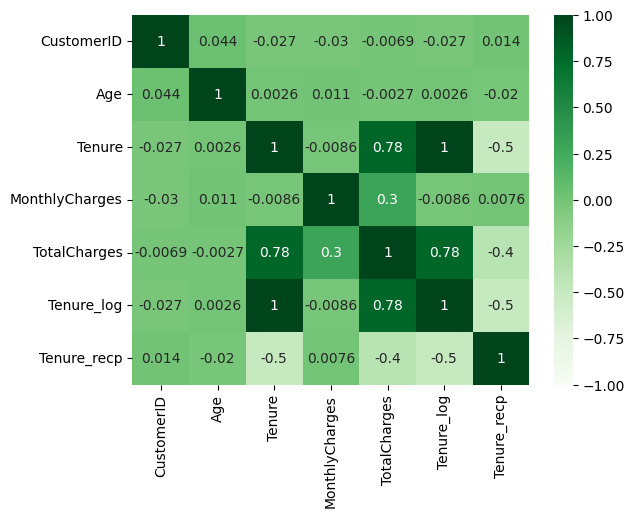

In [54]:
sns.heatmap(corr, annot=True, cmap="Greens", vmin=-1, vmax=1)

#### 2.i Labeling Churn Data

To make it easier for analysis, we can change the labeling of Churn column (which is Yes or No) into a binary value (0 and 1) using LabelEncoder from scikitlearn

In [55]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [56]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['Churn'] = label_encoder.fit_transform(df['Churn'])

df['Churn'].unique()

array([1, 0])

### 3. Statistical Test

#### 3a. Business Question

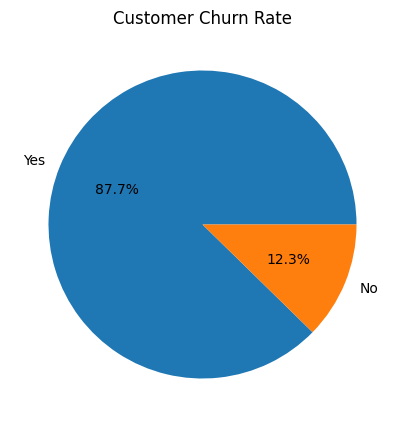

In [57]:
plt.figure(figsize=(10,5))

churn_counts = df['Churn'].value_counts()

labels = ['Yes', 'No']
sizes = [churn_counts[1], churn_counts[0]] 

plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Rate')
plt.show()

In [58]:
df['Age'].mean()

np.float64(44.65437302423604)

Based on the pie chart above, we can infer that the churn rate for this telecom company is 88.3%, which is way higher than the industry standard (31%). The average age of the consumer base is 44, which is middle aged. A sales manager assumes that the customer that older people tend to use internet less, therefore most of them churned.

#### 3b. Define Hypothesis

Based on the statement above, we can make a hypothesis that states:

**- H0: There is no significant difference in churn rate between younger and older consumers.**

**- H1: Older consumers have a significantly higher churn rate than younger consumers.**

Based on this hypotheses above, we will use two-tailed test (because the H1 != θ0)

#### 3c. Hypothesis Testing using T-Test

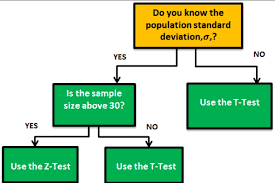

Why T-Test?
- Unknown standard deviation from population (not mentioned)

<Axes: xlabel='Age', ylabel='Density'>

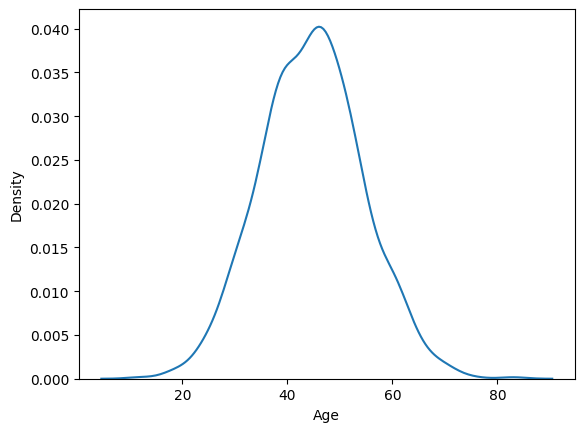

In [59]:
sns.kdeplot(df['Age'])

In [60]:
df['Age'].describe()

count    949.000000
mean      44.654373
std        9.751157
min       12.000000
25%       38.000000
50%       45.000000
75%       51.000000
max       83.000000
Name: Age, dtype: float64

##### 3.c.1. Calculate T-Statistics

Next is we want to compute t-statistics, with the formula being:

$$ t = \frac{\bar{x}-\mu_0}{\sqrt{s^2/n}}$$

- t-value tells us about how far the deviation sample mean $\bar{x}$ and population mean $\mu$ under assumption $H_0$ is true.
- We will use the ttest_1samp() function to calculate t-statistics and p-value for one-sample mean test

In [61]:
#create statistical test for T-Value
from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = df['Age'], popmean=44, alternative='two-sided') #h1 != theta 0
print(f"t statistics: {t_statistics:.4f}")
print(f"p-value: {p_value:.4f}")

t statistics: 2.0673
p-value: 0.0390


##### 3.c.2. Defined Significance Level

Next is to find critical value based on alpha (significance level), which is 5% and because there is two regions (left and right), we divided the alpha into two:

In [62]:
from scipy.stats import t
t_crit = t.ppf(1-0.025, df = 949-1) #the dataset have 949 rows after dropping the 0.0 TotalCharges values
print(f'The critical value will be : ±{t_crit:.2f}')

The critical value will be : ±1.96


The critical region will be in:

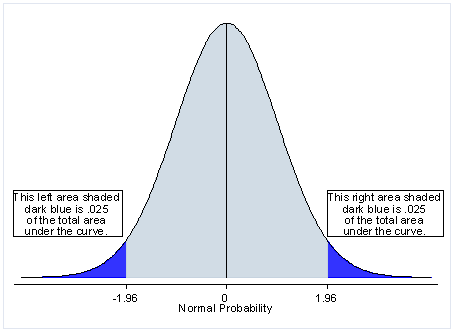

##### 3.c.3. Reject/Accept H0 based on Decision Rules

After that, we can create decision rules to either reject H0 or accept H0 based on t-statistic and p-value results

In [63]:
alpha = 0.05

if p_value<alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [64]:
if t_statistics>t_crit or t_statistics <-t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


Visualize the critical region

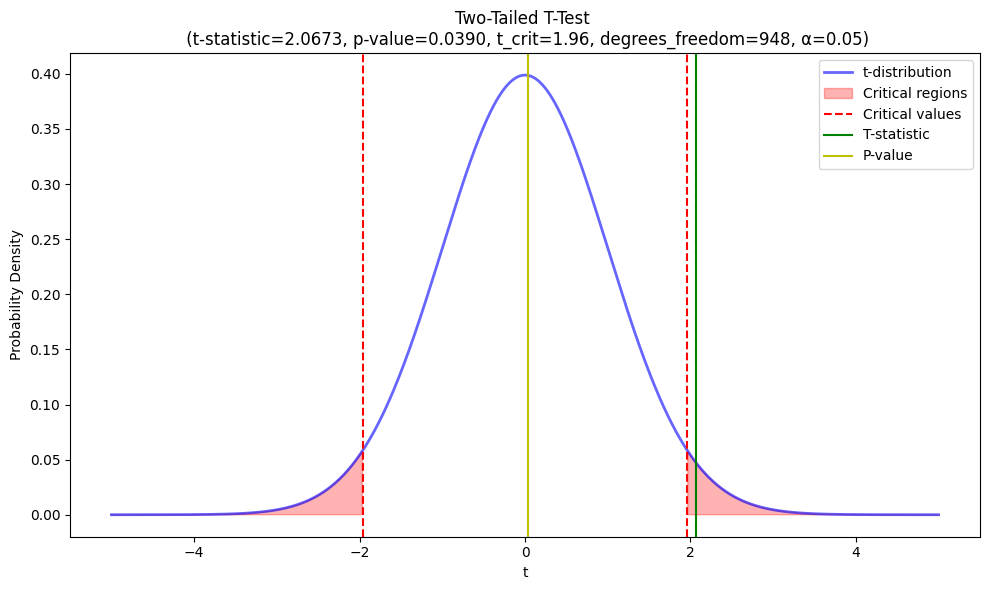

In [65]:
# #degrees of freedom
degree_freedom = 949-1

# Create the plot
plt.figure(figsize=(10, 6))

# Generate x values for the t-distribution
x = np.linspace(-5, 5, 1000)

# Plot the t-distribution
plt.plot(x, t.pdf(x, degree_freedom), 'b-', lw=2, alpha=0.6, label='t-distribution')

# Fill the critical regions
plt.fill_between(x, 0, t.pdf(x, degree_freedom), where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Critical regions')

# Add vertical lines for critical values and t-statistic
plt.axvline(-t_crit, color='r', linestyle='--', label='Critical values')
plt.axvline(t_crit, color='r', linestyle='--')
plt.axvline(t_statistics, color='g', linestyle='-', label='T-statistic')
plt.axvline(p_value, color='y', linestyle='-', label='P-value')

# Labeling
plt.title(f"Two-Tailed T-Test \n (t-statistic={t_statistics:.4f}, p-value={p_value:.4f}, t_crit={t_crit:.2f}, degrees_freedom={degree_freedom}, α={alpha})")
plt.xlabel('t')
plt.ylabel('Probability Density')

# Add text annotations
# plt.text(0, 0.2, f't-statistic: {t_statistics:.4f}\np-value: {p_value:.4f}', ha='center', va='center', 
#          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

#### 3d. Decision Results

**There is enough evidence to say that the customer who churned is on the older side**.

Manager should reconsider a new strategy to retain the consumer base for the older people.

### 4. Regression Model

In [66]:
def get_results_table(regression_model):
    "Function to print Coefficient, Std Error, and R-Squared value from statsmodels"
    
    results_df = pd.DataFrame({
        'Coefficient': regression_model.params.values,
        'Std Error': regression_model.bse,
        'R-Squared': regression_model.rsquared
    }, index = regression_model.params.index)
    
    return results_df

#### 4a. Single Predictor (Linear Regression) using Weighted Regression (WLS)

**Find the association between TotalCharges and Tenure**

$$TotalCharges = β0 + β1Tenure$$

##### 4.a.1. Model Preparation

In [67]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

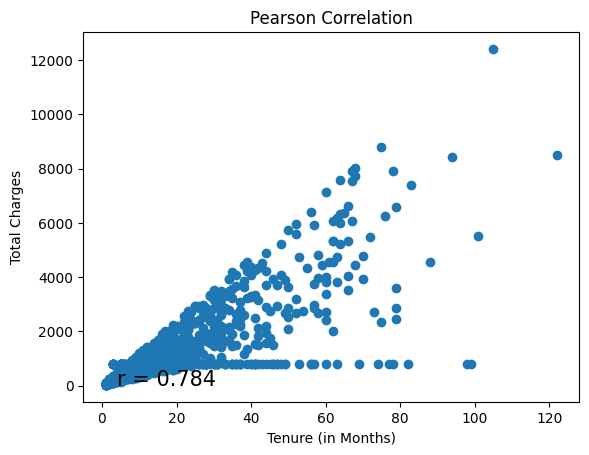

In [68]:
r = scipy.stats.pearsonr(x=df['TotalCharges'], y=df['Tenure'])[0]

# # sns.regplot(x='TotalCharges', y='Tenure', data=df)

plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('Pearson Correlation')

plt.text(4,10, 'r = ' + str(round(r, 4)), fontsize=15)


plt.show()

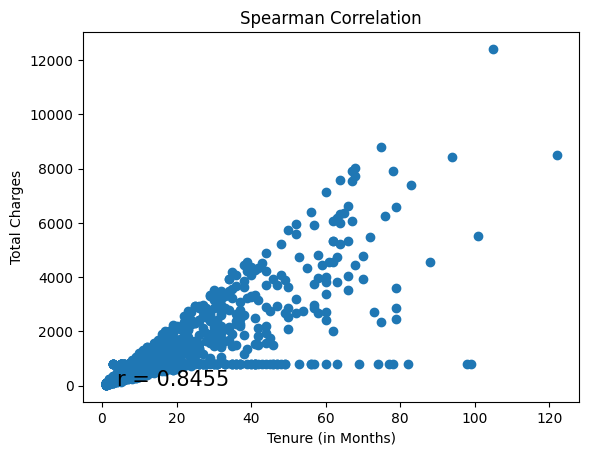

In [69]:
r = scipy.stats.spearmanr(a=df['TotalCharges'], b=df['Tenure'])[0]

# # sns.regplot(x='TotalCharges', y='Tenure', data=df)

plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('Spearman Correlation')

plt.text(4,10, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

Based on the scatter plot above, the data have heteroscedasticity. One of the appropriate method to handle that is to use WLS (Weighted Linear Regression) by giving weights due to the high variances in the data.

Giving weights based on two columns above:

In [70]:
#set weight for weighted regression
weights = 1/(df['Tenure']**2)

In [71]:
df['weights'] = weights
df

CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
5             6   42  Female      16          119.75        Two-Year   
..          ...  ...     ...     ...             ...             ...   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport  Churn  Tenure_log  Tenure_recp  \
0       Fiber Optic        353.40         Yes      1   16.118096     0.250000   
2       Fiber Optic        127.58          No      1   16.118096     0.500000   
3               DSL        818.72         Yes      1   16.118096     0.125000   
4     Not Mentioned       2208.32          No      1   16.118099     0.031250   
5               DSL       1916.00         Yes      1   16.118097     0.062500   
..              ...           ...         ...    ...         ...          ...   
995     Fiber Optic       1522.74         Yes      1   16.118100     0.024390   
996   Not Mentioned        796.32          No      1   16.118097     0.111111   
997     Fiber Optic       1675.80         Yes      1   16.118097     0.066667   
998   Not Mentioned       4465.56          No      1   16.118102     0.014706   
999   Not Mentioned         56.67          No      1   16.118096     1.000000   

      weights  
0    0.062500  
2    0.250000  
3    0.015625  
4    0.000977  
5    0.003906  
..        ...  
995  0.000595  
996  0.012346  
997  0.004444  
998  0.000216  
999  1.000000  

[949 rows x 13 columns]

In [72]:
# count_all_inf = ((df['weights'] == np.inf) | (df['weights'] == -np.inf)).sum()
# print(count_all_inf)

Remove infinite values

In [73]:
# df['weights'].replace(np.inf, np.nan, inplace=True)

# df.dropna(subset=['weights'], inplace=True)

In [74]:
df[['TotalCharges', 'Tenure']].var()
df[['TotalCharges', 'Tenure']].isnull().sum()

TotalCharges    0
Tenure          0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       949 non-null    int64  
 1   Age              949 non-null    int64  
 2   Gender           949 non-null    object 
 3   Tenure           949 non-null    int64  
 4   MonthlyCharges   949 non-null    float64
 5   ContractType     949 non-null    object 
 6   InternetService  949 non-null    object 
 7   TotalCharges     949 non-null    float64
 8   TechSupport      949 non-null    object 
 9   Churn            949 non-null    int64  
 10  Tenure_log       949 non-null    float64
 11  Tenure_recp      949 non-null    float64
 12  weights          949 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 103.8+ KB


In [76]:
df['weights'].isnull().sum()

np.int64(0)

##### 4.a.2. Building Model

No transformation:

In [77]:
valid_weights = df['weights'].notnull()

wls_model = smf.wls('TotalCharges ~ Tenure', data=df, weights=valid_weights)

wls_results = wls_model.fit()

# print(wls_results.summary())

results_table = get_results_table(wls_results)
results_table

Coefficient  Std Error  R-Squared
Intercept   108.854377  42.955814   0.614673
Tenure       60.759667   1.563265   0.614673

With log transformation:

In [78]:
valid_weights = df['weights'].notnull()

wls_model_log = smf.wls('TotalCharges ~ Tenure_log', data=df, weights=valid_weights)

wls_results_log = wls_model_log.fit()

# print(wls_results_log.summary())

results_table = get_results_table(wls_results_log)
results_table

Coefficient     Std Error  R-Squared
Intercept  -9.793336e+09  2.519695e+08   0.614673
Tenure_log  6.075988e+08  1.563271e+07   0.614673

With reciprocal transformation:

In [79]:
valid_weights = df['weights'].notnull()

wls_model_recp = smf.wls('TotalCharges ~ Tenure_recp', data=df, weights=valid_weights)

wls_results_recp = wls_model_recp.fit()

# print(wls_results_recp.summary())

results_table = get_results_table(wls_results_recp)
results_table

Coefficient   Std Error  R-Squared
Intercept    1725.185478   52.501490   0.163508
Tenure_recp -2501.161387  183.834678   0.163508

##### 4.a.3. Plotting Model

No transformation:

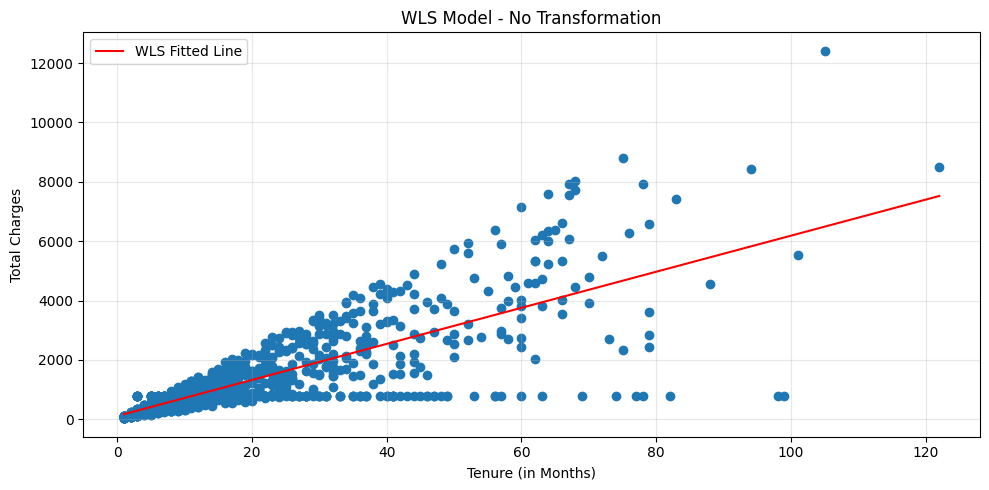

In [80]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure'].min(), df['Tenure'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - No Transformation')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

With log transform:

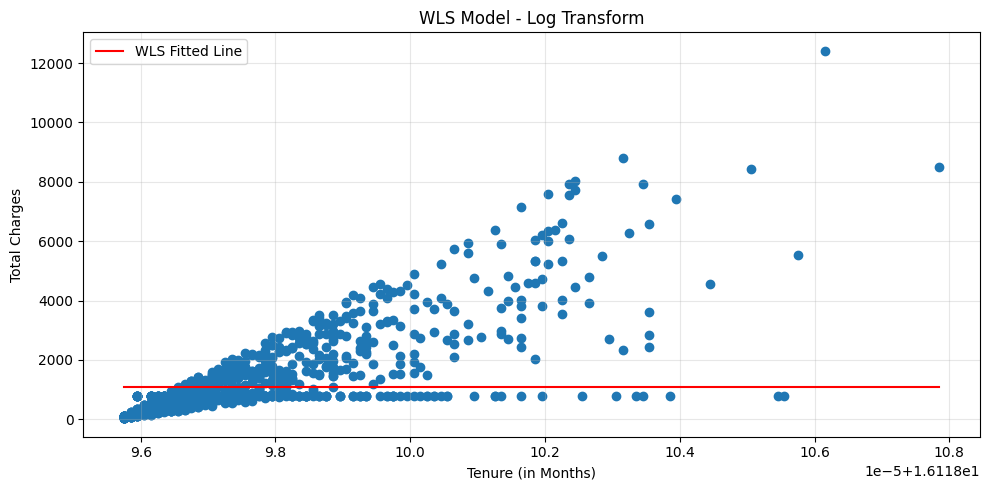

In [81]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure_log'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure_log'].min(), df['Tenure_log'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - Log Transform')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

With reciprocal transform:

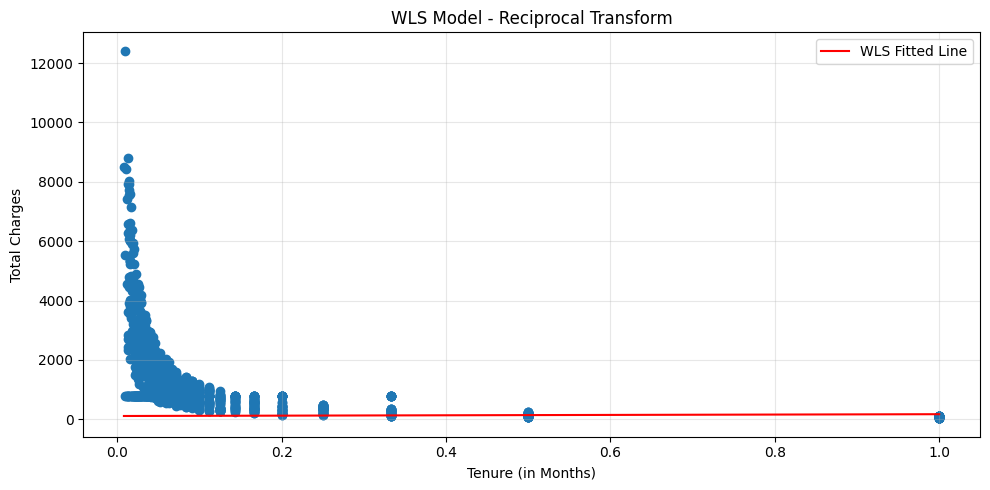

In [82]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Tenure_recp'], y=df['TotalCharges'])

# Generate points for the WLS regression line
tenure_range = np.linspace(df['Tenure_recp'].min(), df['Tenure_recp'].max(), 100)
charges_pred = wls_results.predict(exog=dict(Tenure=tenure_range))

# Plot the WLS regression line
plt.plot(tenure_range, charges_pred, color='red', label='WLS Fitted Line')

plt.xlabel('Tenure (in Months)')
plt.ylabel('Total Charges')
plt.title('WLS Model - Reciprocal Transform')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Using OLS:

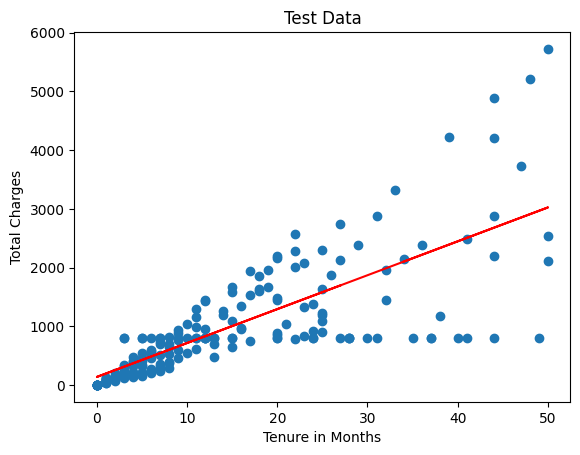

Based on the three models above, we can infer that No Transformation is best for this case. Because:
- Log Transform
    - While the R-squared value is pretty good, the intercept and coefficient value is too high
- Reciprocal Transform
    - Low R-Squared value
    - The data tends to create a exponential pattern

##### 4.a.4. Evaluate WLS Model (Single Predictor)

- Visualize the residual

https://www.statology.org/residual-plot-python/, accesed on Oct 12th, 2024

No Transformation

Text(0.5, 1.0, 'No Transformation')

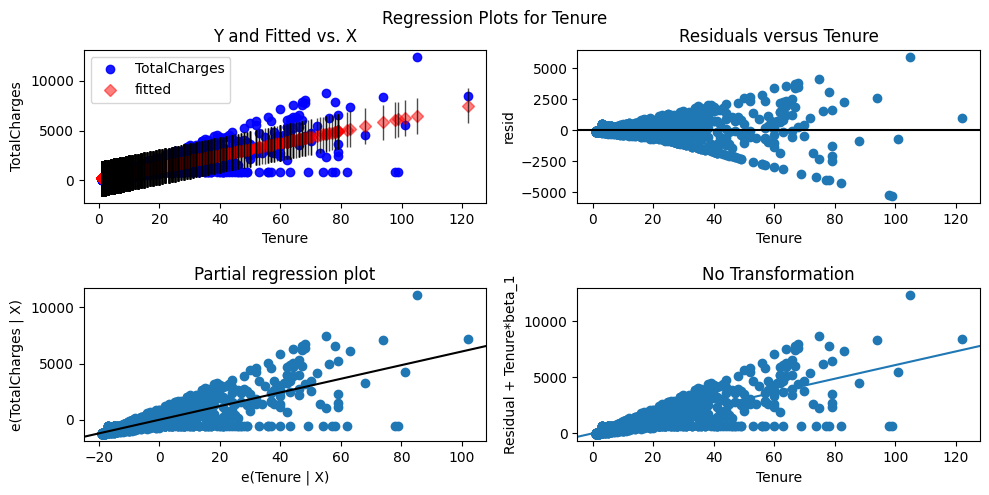

In [83]:
fig = plt.figure(figsize=(10,5))

fig = sm.graphics.plot_regress_exog(wls_results, 'Tenure', fig=fig)

plt.title('No Transformation')

Log Transformation

Text(0.5, 1.0, 'Log Transformation')

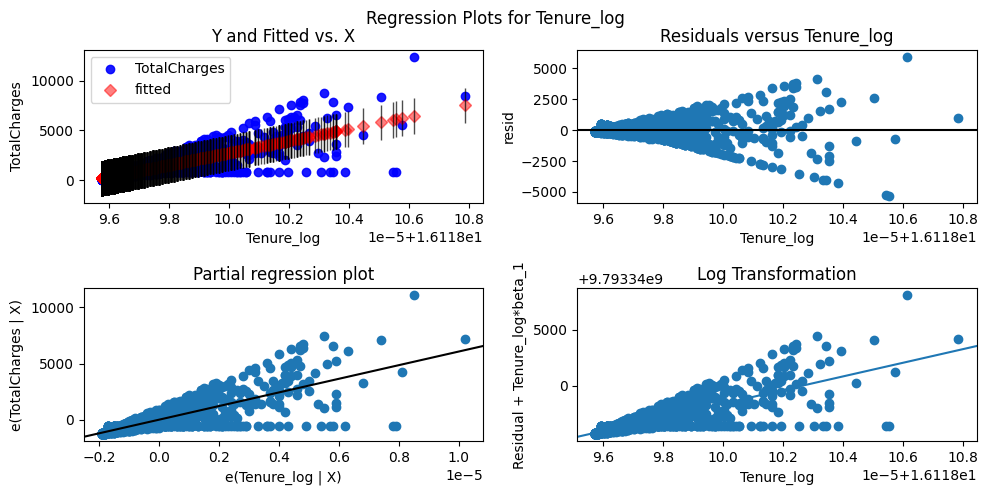

In [84]:
fig = plt.figure(figsize=(10,5))

fig = sm.graphics.plot_regress_exog(wls_results_log, 'Tenure_log', fig=fig)

plt.title('Log Transformation')

Reciprocal Transformation

Text(0.5, 1.0, 'Reciprocal Transformation')

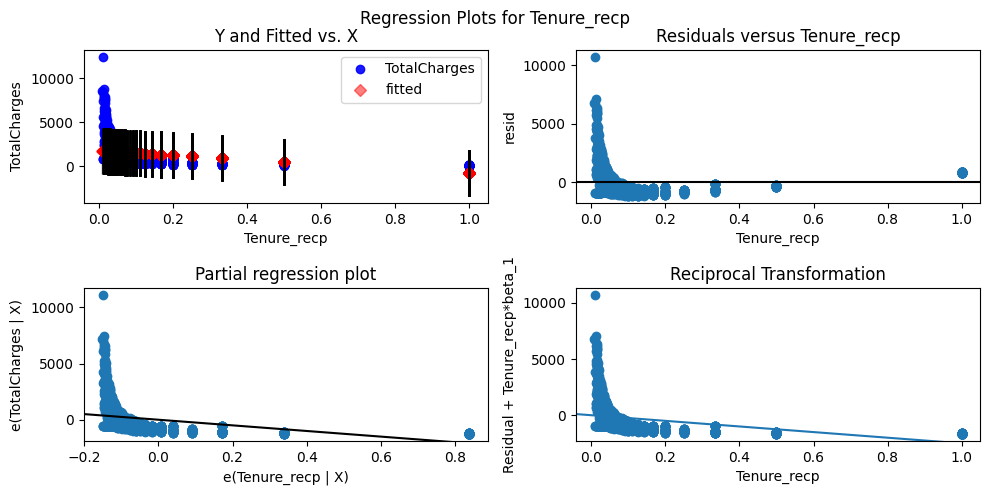

In [85]:
fig = plt.figure(figsize=(10,5))

fig = sm.graphics.plot_regress_exog(wls_results_recp, 'Tenure_recp', fig=fig)

plt.title('Reciprocal Transformation')

Heterodiascity affects the data because in the residual plot, the data points doesn't showed randomly

- Interpret R-squared value

In [86]:
print(f'R-Squared Value for No Transformation: {wls_results.rsquared:.4f}')
print(f'R-Squared Value for Log Transformation: {wls_results_log.rsquared:.4f}')
print(f'R-Squared Value for Reciprocal Transformation: {wls_results_recp.rsquared:.4f}')

R-Squared Value for No Transformation: 0.6147
R-Squared Value for Log Transformation: 0.6147
R-Squared Value for Reciprocal Transformation: 0.1635


##### 4.a.5. Coefficient Interpretation

Using the no transform model, the parameters will be:
$$TotalCharges = 108.85 + 60.75Tenure$$

By default, the customer who have 0 tenure will have an average of $108.85 for their Total Charge. Which doesn't make sense. For better interpretation, let's take the average tenure, which is 20 months. 

By using centering, we can get: 

$$TotalCharges = 108.85 + 60.75(Tenure - 20)$$

This can be viewed as:

$$TotalCharges = 108.85 + 60.75(Tenure - 20)$$
$$TotalCharges = 108.85 -1215 + 60.75Tenure$$
$$TotalCharges = -1106.15 + 60.75Tenure$$

Assuming the Tenure of two customers who have 25 months (above the average) we can get the average TotalCharges:
$$TotalCharges = -1106.15 + 60.75Tenure$$
$$TotalCharges = -1106.15 + 60.75(25)$$
$$TotalCharges = 412.60

We can derive from the equations above that the average TotalCharges for customers who have an above average tenured (25 months) is $412.60.

**Based on the parameters above, the interpretation now has changed to the mean of TotalCharges whose customers have a tenure which is equal to the average of the sample**

http://www.med.mcgill.ca/epidemiology/joseph/courses/EPIB-621/centered_var.pdf, accesed on Oct 15th 2024

#### 4b. Multiple Predictor (WLS)

For this Multiple Predictor section, we want to know the association between TotalCharges with two predictor variables (one of them is Tenure). To do this, we have two options:

1. **MonthlyCharges as Predictor**

$$TotalCharges = β0 + β1Tenure + β2MonthlyCharges $$

    With interactions:

$$TotalCharges = β0 + β1Tenure + β2MonthlyCharges +β3.Tenure.MonthlyCharges $$

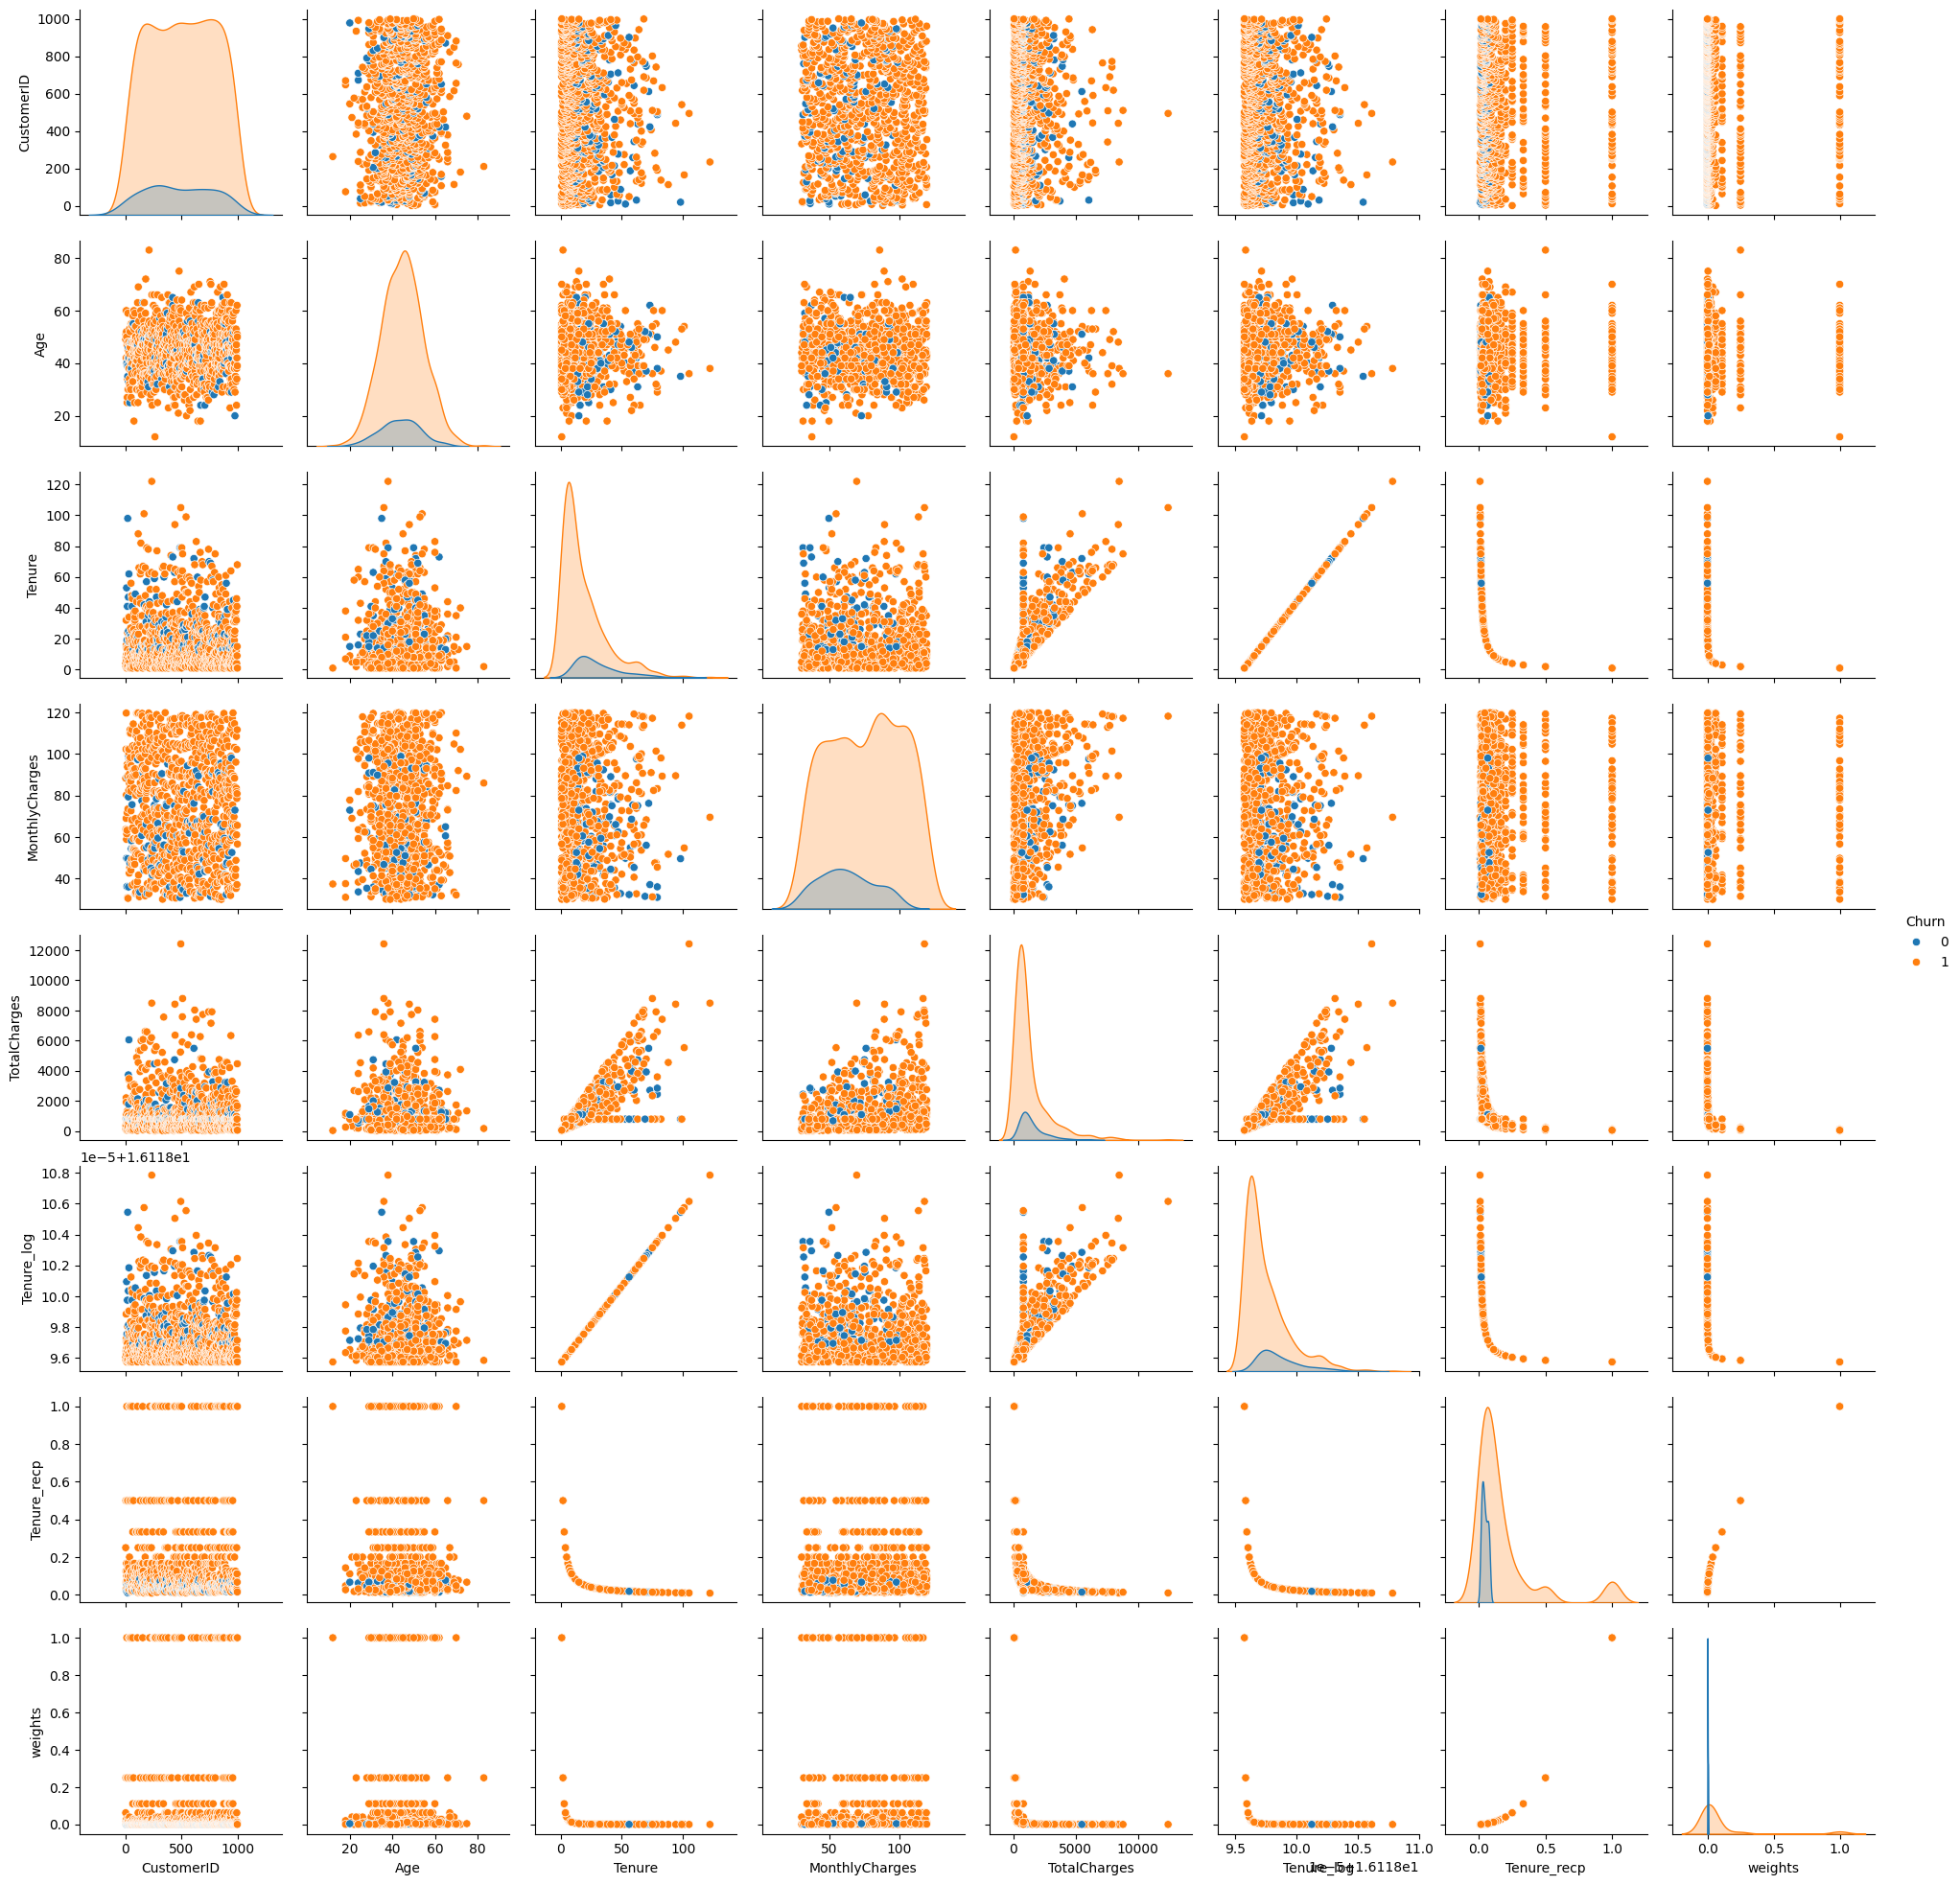

In [87]:
sns.pairplot(df, hue='Churn')

2. **Churn as Predictor**

$$TotalCharges = β0 + β1Tenure + β2Churn $$

    With interactions:

$$TotalCharges = β0 + β1Tenure + β2Churn +β3.Tenure.Churn $$

##### 4.b.1. Building Multiple Predictor Model

1. Tenure and MonthlyCharges as Predictors

- Without interactions

In [88]:
valid_weights = df['weights'].notnull()

wls_multiple_pred = smf.wls('TotalCharges ~ Tenure + MonthlyCharges', data=df, weights=valid_weights) #without interactions

wls_results_no_interact_charge = wls_multiple_pred.fit()

# print(wls_results.summary())

results_table = get_results_table(wls_results_no_interact_charge)
results_table

Coefficient  Std Error  R-Squared
Intercept      -1186.016813  83.192117   0.708293
Tenure            60.962729   1.360933   0.708293
MonthlyCharges    17.390140   0.998038   0.708293

- With interactions

In [89]:
interaction_term = df['Tenure'] * df['MonthlyCharges']

valid_weights = df['weights'].notnull()

wls_multiple_pred = smf.wls('TotalCharges ~ Tenure + MonthlyCharges + Tenure:MonthlyCharges', data=df, weights=valid_weights) #with interactions

wls_results_interact_charge = wls_multiple_pred.fit()

# print(wls_results.summary())

results_table = get_results_table(wls_results_interact_charge)
results_table

Coefficient  Std Error  R-Squared
Intercept               140.576777  97.338939   0.792924
Tenure                   -3.682959   3.483783   0.792924
MonthlyCharges           -0.320669   1.232888   0.792924
Tenure:MonthlyCharges     0.865270   0.044029   0.792924

2. Tenure and Churn as Predictors

- Without interactions

In [90]:
wls_multiple_pred = smf.wls('TotalCharges ~ Tenure + Churn', data=df, weights=valid_weights) #without interactions

wls_results_no_interact_churn = wls_multiple_pred.fit()

# print(wls_results.summary())

results_table = get_results_table(wls_results_no_interact_churn)
results_table

Coefficient  Std Error  R-Squared
Intercept  -390.747532  95.190086   0.628153
Tenure       62.637964   1.569612   0.628153
Churn       527.025568  89.997827   0.628153

- With interactions

In [91]:
interaction_term = df['Tenure'] * df['Churn']

wls_multiple_pred = smf.wls('TotalCharges ~ Tenure + Churn + Tenure:Churn', data=df, weights=valid_weights) #with interactions

wls_results_interact_churn = wls_multiple_pred.fit()

# print(wls_results.summary())

results_table = get_results_table(wls_results_interact_churn)
results_table

Coefficient   Std Error  R-Squared
Intercept      566.548184  157.297690   0.649174
Tenure          31.007465    4.471719   0.649174
Churn         -507.530174  162.948587   0.649174
Tenure:Churn    35.795892    4.757054   0.649174

##### 4.b.2. Plotting Multiple Predictor Model

1. Tenure and MonthlyCharges as Predictors

No interactions:

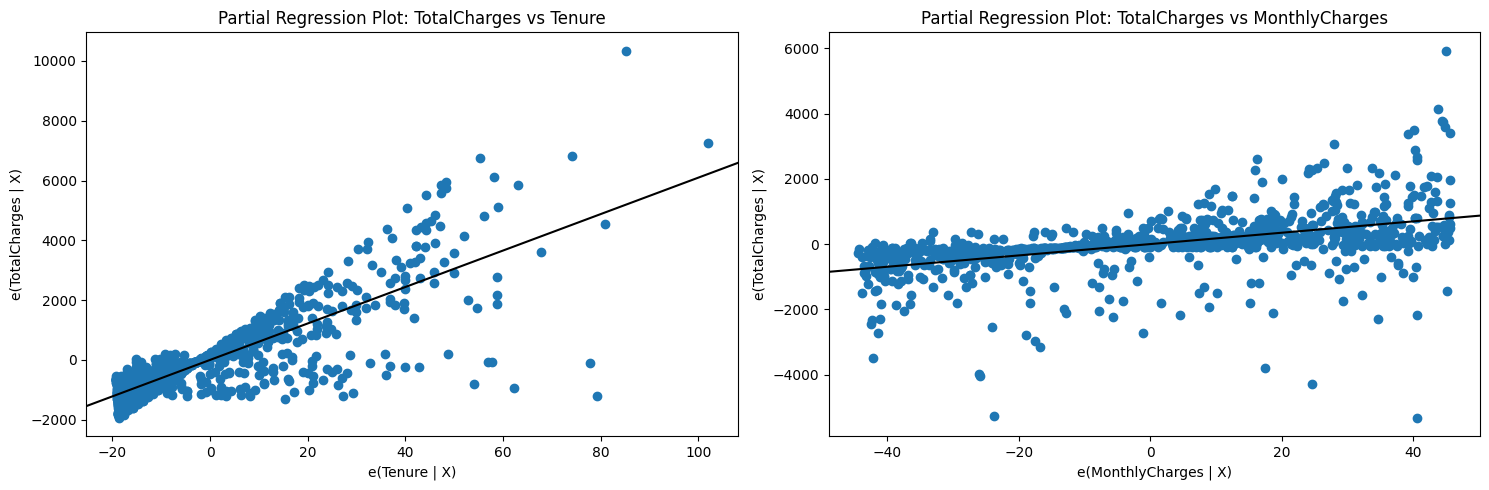

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sm.graphics.plot_partregress(endog='TotalCharges', 
                             exog_i='Tenure', 
                             exog_others=['MonthlyCharges'], 
                             data=df, 
                             ax=axes[0])

sm.graphics.plot_partregress(endog='TotalCharges', 
                             exog_i='MonthlyCharges', 
                             exog_others=['Tenure'], 
                             data=df, 
                             ax=axes[1])

#remove text for weights
for ax in axes:
    for text in ax.texts:
        text.remove()

axes[0].set_title('Partial Regression Plot: TotalCharges vs Tenure')
axes[1].set_title('Partial Regression Plot: TotalCharges vs MonthlyCharges')

plt.tight_layout()
plt.show()

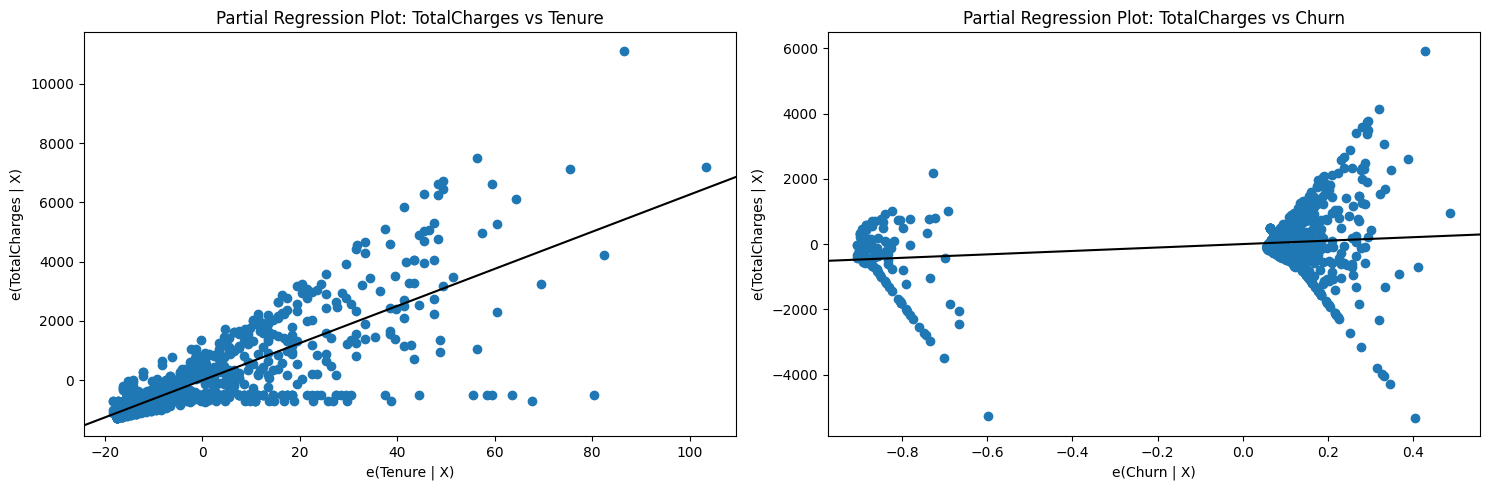

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sm.graphics.plot_partregress(endog='TotalCharges', 
                             exog_i='Tenure', 
                             exog_others=['Churn'], 
                             data=df, 
                             ax=axes[0])

sm.graphics.plot_partregress(endog='TotalCharges', 
                             exog_i='Churn', 
                             exog_others=['Tenure'], 
                             data=df, 
                             ax=axes[1])

#remove text for weights
for ax in axes:
    for text in ax.texts:
        text.remove()

axes[0].set_title('Partial Regression Plot: TotalCharges vs Tenure')
axes[1].set_title('Partial Regression Plot: TotalCharges vs Churn')

plt.tight_layout()
plt.show()

With interaction:

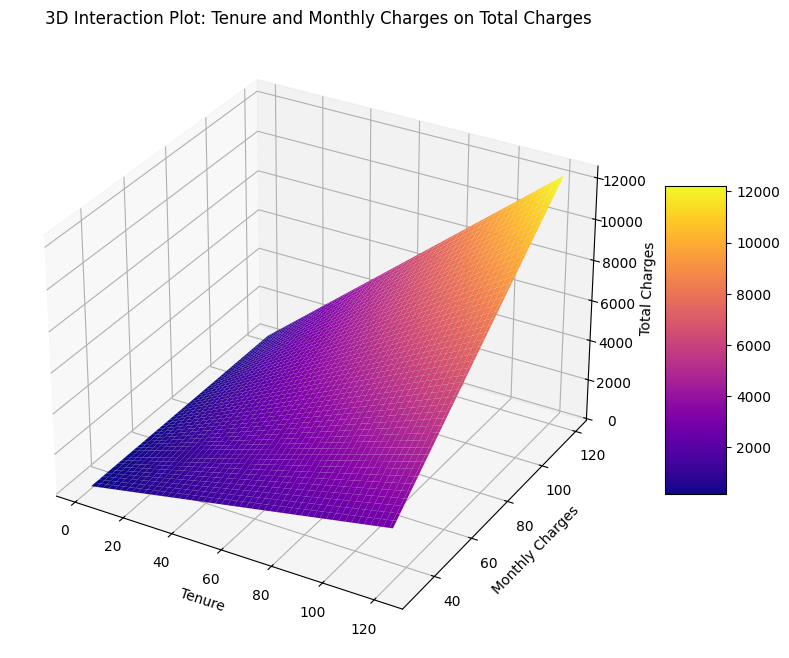

In [94]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of Tenure and MonthlyCharges
tenure_vals = np.linspace(df['Tenure'].min(), df['Tenure'].max(), 100)
monthly_charges_vals = np.linspace(df['MonthlyCharges'].min(), df['MonthlyCharges'].max(), 100)
Tenure, MonthlyCharges = np.meshgrid(tenure_vals, monthly_charges_vals)

params = wls_results_interact_charge.params

# Calculate predicted TotalCharges
TotalCharges_pred = (params['Intercept'] +
                     params['Tenure'] * Tenure + 
                     params['MonthlyCharges'] * MonthlyCharges +
                     params['Tenure:MonthlyCharges'] * Tenure * MonthlyCharges)

# Plot 3D surface
surf = ax.plot_surface(Tenure, MonthlyCharges, TotalCharges_pred, cmap='plasma')
# ax.view_init(elev=0., azim=120.)

fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)

ax.set_xlabel('Tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')
ax.set_title('3D Interaction Plot: Tenure and Monthly Charges on Total Charges')

plt.show()

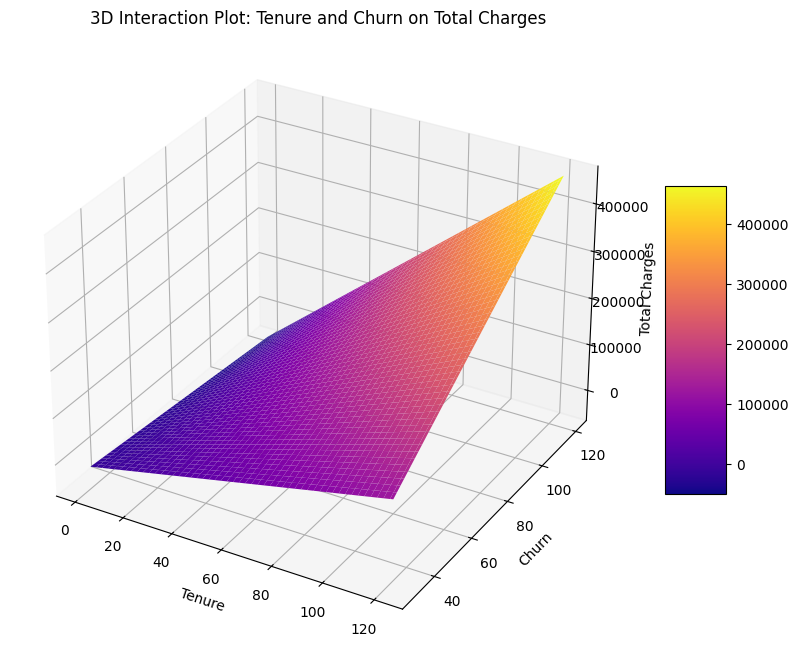

In [95]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of Tenure and MonthlyCharges
tenure_vals = np.linspace(df['Tenure'].min(), df['Tenure'].max(), 100)
churn_vals = np.array([1, 0]) #binary (0 and 1)
Tenure, Churn = np.meshgrid(tenure_vals, monthly_charges_vals)

params = wls_results_interact_churn.params

# Calculate predicted TotalCharges
TotalCharges_pred = (params['Intercept'] +
                     params['Tenure'] * Tenure + 
                     params['Churn'] * Churn +
                     params['Tenure:Churn'] * Tenure * Churn)

# Plot 3D surface
surf = ax.plot_surface(Tenure, Churn, TotalCharges_pred, cmap='plasma')

fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)

ax.set_xlabel('Tenure')
ax.set_ylabel('Churn')
ax.set_zlabel('Total Charges')
ax.set_title('3D Interaction Plot: Tenure and Churn on Total Charges')

plt.show()

##### 4.b.3 Model Comparisons 

As stated before, the objective for this WLS - Multiple Predictors is to **find association** between variables, not to predict. Here we try to compare the model that we've built before before interpret it to match our case better.

1. No Interaction

**For this comparison, we ignore the TotalCharges with Tenure because it shows the same line as the WLS - Single Predictor above.**

Let's label the first partial regression plot A (Tenure and MonthlyCharges) as A and the second one (Tenure and Churn) as B. Based on those two plots above, we can infer that:

| Plot A (no interaction)  | Plot B (no interaction) |
| -------- | ------- |
| TotalCharges and MonthlyCharges shows gentle slope, while it's not linear but it shows linearity to some extend | TotalCharges and Churn shows much more gentler slope (almost horizontal) compare to TotalCharges and MonthlyCharges, indicating weaker linear relationship |

2. With Interaction

Let's label the first surface plot (Tenure:MonthlyCharges) as A and the second one (Tenure:Churn) as B. Based on those two plots above, we can infer that:

| Plot A (with interaction) | Plot B (with interaction) |
| -------- | ------- |
| Smooth gradial ascent  | Steeper gradial ascent   |
| TotalCharges increases steeply as Tenure and MonthlyCharges increase | TotalCharges increases more steeper than Plot A as Tenure and MonthlyCharges increase **(look at the max value of TotalCharges)**    |
| 0.86 coefficient interaction, indicating positive interaction  | 35.79 coefficient interaction, indicating higher positive interaction or **stronger interaction**   |

We can infer that Plot B shows more "jump" compare to Plot A. This indicates that Churn (Yes or No) affects the overall charges.

Based on our objective and model comparisons above, we should use the model with interaction, with the predictors being Tenure:Churn. The reason why is because Churn (which stated customer still using our services or not):
- clear indicator (binary data) that make it easier for interpretation
- better for business analysis (atleast we can know how much money we lost if a customer churned)

##### 4.b.4 Coefficient Interpretation (Multiple Predictor)

$$TotalCharges = β0 + β1Tenure + β2Churn +β3.Tenure.Churn $$

$$TotalCharges = 566.54 + 31Tenure  -507.53Churn +35.79Tenure.Churn $$

We can classify the interpretation into two:
- Churned Customers (1)

$$TotalCharges = 566.54 + 31Tenure -507.53 +35.79Tenure$$

- Retained Customers (0)

$$TotalCharges = 566.54 + 31Tenure$$

Notice that for Tenure, it's not possible for it to have 0 months. To mitigate that, we need to use centering (same method as in single predictor above).

- Churned Customers (1)
$$TotalCharges = 566.54 + 31(Tenure - 20) -507.53 +35.79(Tenure - 20)$$
$$TotalCharges = 566.54 - 507.53 - 620 - 715.8 +Tenure(31 + 35.79)$$
$$TotalCharges = -1276.79 + 66.79Tenure$$

- Retained Customers (0)
$$TotalCharges = 566.54 + 31(Tenure - 20)$$
$$TotalCharges = 566.54 -620 + 31Tenure$$
$$TotalCharges = -53.46 + 31Tenure$$

Assuming the Tenure of two customers who have 25 months (above the average) with one of them churned while the other retained, we can get the average TotalCharges:

- Churned Customer (1) with 25 month tenure
$$TotalCharges = -1276.79 + 66.79(25)$$
$$TotalCharges = 392.96$$

- Retained Customer (0) with 25 month tenure
$$TotalCharges = -53.46 + 31(25)$$
$$TotalCharges = 721.54$$

We can infer that the customer who churned have an average TotalCharges of $392.96, while the customer who retained have an average of TotalCharges of $721.54.

### 5. Conclusions and Recommendations

##### Conclusions

Based on our statistical test above (T-test), there is enough evidence to reject H0, meaning that **there is enough evidence to say that the customer who churned is on the older side**.

For the regressions, we can conclude that:

**a. Single Predictor**

Based on the analysis above, customers who have an above-average tenure (25 months, with the average tenure being 20 months) will have a TotalCharge of $412.60. This can be attributed to a positive coefficient in Tenure (60.75), meaning that the higher the Tenure, the higher the customer TotalCharges will be. This suggests a positive linear relationship.
 
**b. Multiple Predictor**

Based on the analysis above, we can classified the customers into two categories:
- Churned

The churned customers with an above-average tenure (25 months, with the average tenure being 20 months) will have a TotalCharge of $392.96.

- Retained

The retained customers with an above-average tenure (25 months, with the average tenure being 20 months) will have a TotalCharge of $721.54.

**To sum it up, customers who retained will have almost twice the amount of TotalCharges, compared to customers who churned.**

##### Recommendations

For future analysis, we suggest using non-linear models for a better fit.

For business, we should create a new appealing promotion/features to retain our customers more (especially older customers), minimize losses, and maximize our profits.